# Linear Models
Notebook for p.45 - 68

In [39]:
import pandas as pd
import mglearn
import numpy as np
import matplotlib.pyplot as plt

## Linear Models for regression

w[0]: 0.393906  b: -0.031804


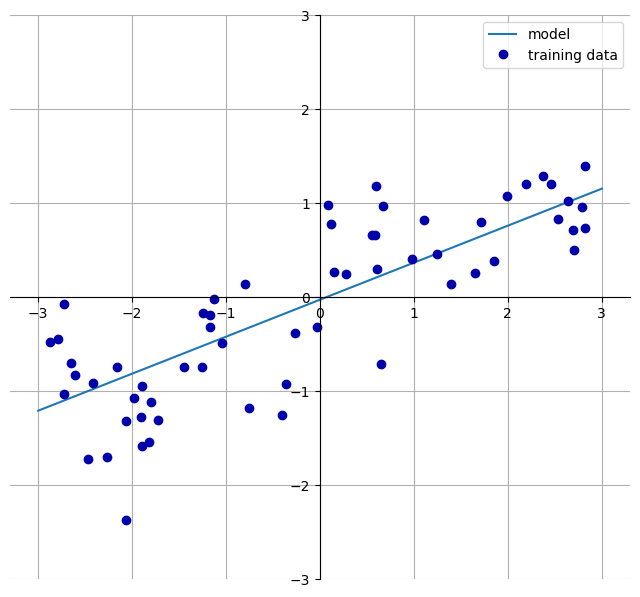

In [40]:
mglearn.plots.plot_linear_regression_wave()

## Linear regression (aka ordinary least squares)

https://en.wikipedia.org/wiki/Least_squares

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)

In [42]:
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


<b>NOTE</b><br>
For regression <code>y = w[0]x[0] + w[1]x[1] + ... + w[n]x[n] + b</code><br>
Coefficients are set <code>w</code><br>
And Intercept is a bias <code>b</code><br>

In [43]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.67
Test set score: 0.66


Here an overfitting can be noticed. Let's check, how will the model perform on data with more dimensions

In [44]:
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [45]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.61


Difference between train set score and test set score is a clear sign of overfitting. To avoid that, model should be easier. <b>Rigde regression</b> is a common solution for such a problem

## Ridge regression

https://en.wikipedia.org/wiki/Ridge_regression
<br>
<br>
Ridge regression is also a linear model. However, ridge regression have one additional limitation. In ridge regression, the magnitude of coefficients should be as small as possible, I.E. <code>w[k]</code> are close to zero. In such a case, impact of each feature on output is really small.
<br>
This constraint is an example of so-called regularization

In [46]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


Ridge regression complexity can be decreased by increasing alpha(by increasing how restricted it is)

In [47]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.64


Let's now increase it's complexity

As we see, for such a small alpha Ridge Regression behaves almost like a common Linear Regression

In [48]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.93
Test set score: 0.77


Let's inspect, how model coefficients magnitude changes with alpha

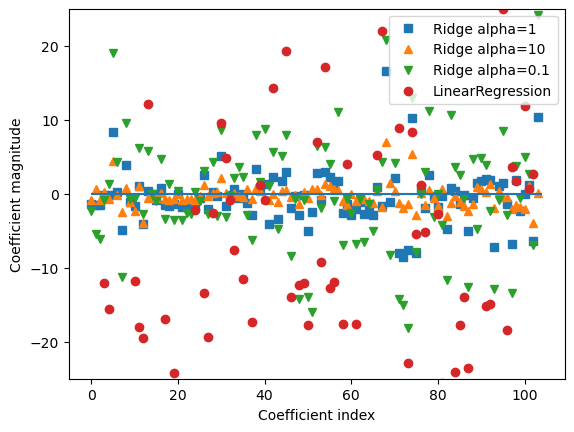

In [49]:
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")
plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()